<a href="https://colab.research.google.com/github/narayanacharyuluchitroju/DeepLearningModels/blob/main/Pretrained_Models_for_Image_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Pre-Trained Models in Torchvision Models</h1>

Many well-known CNN models have been **pre-trained** on large benchmark datasets like **ImageNet**. The Deep Learning community has greatly benefited from these open-source models. Also, the pre-trained models are a major factor for rapid advances in Computer Vision research. Other researchers and practitioners can use these state-of-the-art models instead of re-inventing everything from scratch.

<img src='https://opencv.org/wp-content/uploads/2022/03/c4_03_VGG-16_pretrained.png' width=1000 align='center'><br/>

### What is ImageNet?
[ImageNet](http://www.image-net.org/) is a project which aims to provide a large image database for research purposes. It contains more than 1.2 million images comprising 1,000 classes (or synsets). They also provide bounding box annotations which can be used in Object Localization tasks. It should be noted that they only provide urls of images, and you need to download those images. For reference, here is the list of class labels for ImageNet <a href="https://image-net.org/challenges/LSVRC/2012/browse-synsets" target="_blank">ImageNet Class Labels.</a>

### How Can We Use Pre-Trained Models?
We can use them right out-of-the-box for image classification or we can use them as a starting point for further training to fine-tune the for own custom dataset. Many of these State-of-the-Art models are already available through Torchvision in the form of [Torchvision Models](https://pytorch.org/vision/main/models.html) which have been pre-trained on the ImageNet dataset. So, we can use them directly for many types of image classification tasks as long as the image classes in our dataset are also represented in the ImageNet dataset.

In this Notebook, we will take a look at several models available in the Torchvision Models API and explore how to use these models on our own images.

## Table of Contents

* [1 Pre-trained Classification Models in Torchvision](#1-Pre\-Trained-Classification-Models-in-Torchvision)
* [2 Using a Pre-Trained Model](#2-Using-a-Pre\-Trained-Model)
* [3 Model Comparison](#3-Model-Comparison)
* [4 Conclusion](#3-Conclusion)

In [ ]:
import numpy as np
import requests
import torchvision
import torch
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os
import ast
from PIL import Image
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights


# Text formatting.
bold = "\033[1m"
end = "\033[0m"

## Download data

Download class names from dropbox

In [ ]:
def download_file(url, save_name):
    if not os.path.exists(save_name):

        response = requests.get(url)
        if response.status_code == 200:
            with open(save_name, 'wb') as file:
                file.write(response.content)
        else:
            print(f"Failed to download file from {url}. Status code: {response.status_code}")


In [ ]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [ ]:
download_file(
    "https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt",
    "imagenet_classes.txt")

download_file("https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG",
              "panda_test_image.jpg")

## 1 Pre-Trained Classification Models in Torchvision

Torchvision provides a host of pre-trained models through its <a href="https://pytorch.org/vision/main/models.html" target="_blank">`torchvision.models`</a> API. It contains image classification models that have been pre-trained on the ImageNet dataset. Let's now take a look at all the models available in Torchvision's `torchvision.models`.

In [ ]:
all_modules = dir(torchvision.models)
skip = 0
common = ["detection", "get_model"]
# Navigate the torchvision.models namespace and display the available models.
for en, module in enumerate(all_modules):
    if module[0].islower():
        if skip == 0:
            # Handle special case for vision_transformer.
            if module == "vision_transformer":
                print(f"Model Family: {bold}{module}{end}")
                for mod in all_modules[en + 1 :]:
                    if "vit" in mod:
                        print(f"\t  |__ {mod}")
                        skip += 1

            # Handle special case for inception.
            elif module == "inception":
                print(f"Model Family: {bold}{module}{end}")
                for mod in all_modules[en + 1 :]:
                    if module in mod:
                        print(f"\t  |__ {mod}")
                        skip += 1

            # Handle special case for shufflenet.
            elif "shufflenet" in module:
                module = "shufflenet"
                print(f"Model Family: {bold}{module}{end}")
                for mod in all_modules[en + 1 :]:
                    if "shufflenet" in mod:
                        print(f"\t  |__ {mod}")
                        skip += 1

            # Handle special case for swin.
            elif "swin" in module:
                module = "swin_transformer"
                print(f"Model Family: {bold}{module}{end}")
                for mod in all_modules[en + 1 :]:
                    if ("swin" in mod) and (mod != "swin_transformer"):
                        print(f"\t  |__ {mod}")
                        skip += 1
                    elif mod == "swin_transformer":
                        skip += 1

            # General cases.
            else:
                if module not in common:
                    count = 0
                    for mod in all_modules[en + 1 :]:
                        if module in mod:
                            count += 1
                    if count > 1:
                        print(f"Model Family: {bold}{module}{end}")
                        for mod in all_modules[en + 1 :]:
                            if module in mod:
                                print(f"\t  |__ {mod}")
                                skip += 1

                else:
                    for mod in all_modules[en + 1 :]:
                        if module in mod:
                            skip += 1

        else:
            skip -= 1


Model Family: convnext
	  |__ convnext_base
	  |__ convnext_large
	  |__ convnext_small
	  |__ convnext_tiny
Model Family: densenet
	  |__ densenet121
	  |__ densenet161
	  |__ densenet169
	  |__ densenet201
Model Family: efficientnet
	  |__ efficientnet_b0
	  |__ efficientnet_b1
	  |__ efficientnet_b2
	  |__ efficientnet_b3
	  |__ efficientnet_b4
	  |__ efficientnet_b5
	  |__ efficientnet_b6
	  |__ efficientnet_b7
	  |__ efficientnet_v2_l
	  |__ efficientnet_v2_m
	  |__ efficientnet_v2_s
Model Family: inception
	  |__ inception_v3
Model Family: mnasnet
	  |__ mnasnet0_5
	  |__ mnasnet0_75
	  |__ mnasnet1_0
	  |__ mnasnet1_3
Model Family: mobilenet
	  |__ mobilenet_v2
	  |__ mobilenet_v3_large
	  |__ mobilenet_v3_small
	  |__ mobilenetv2
	  |__ mobilenetv3
Model Family: regnet
	  |__ regnet_x_16gf
	  |__ regnet_x_1_6gf
	  |__ regnet_x_32gf
	  |__ regnet_x_3_2gf
	  |__ regnet_x_400mf
	  |__ regnet_x_800mf
	  |__ regnet_x_8gf
	  |__ regnet_y_128gf
	  |__ regnet_y_16gf
	  |__ regnet_y_1_6

## 2 Using a Pre-Trained Model

Since we are using the torchvision API, it is straightforward to make predictions using a pre-trained model. In the code below, we will perform the following steps.
1. Read the image
2. Perform the required pre-processing as required by the model.
3. Create a data batch from the images. This is needed because the predict method works on image batches.
4. Pass the image through the model
5. Decode the predictions to find the class name and confidence score of predictions.

### 2.1 Load and Display a Test Image

Let's first load and display a test image.

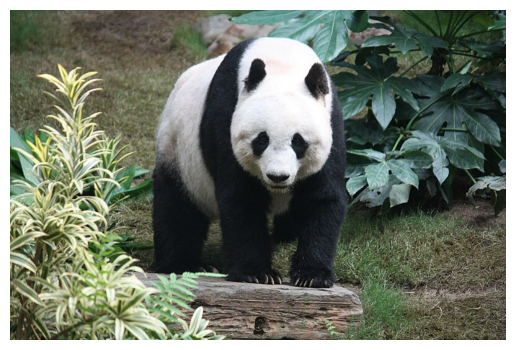

In [ ]:
# Read and display the sample image.
image = plt.imread(IMG_PATH)

plt.imshow(image)
plt.axis("off")
plt.show()

### 2.2 Select a Model and Specify the Required Input Size for the Model

In the code cell below we have provided a list of all the models available in the Torchvision Models API along with the corresponding input image sizes required for each model. You can use this notebook to execute any of these models by simply uncommenting the appropriate `model_family` name and the `model_name` that you would like to use. Many of the models require an input shape of `(224, 224, 3)` but there are also several models that require a different input shape, so you will also need to specify the appropriate input image size, `IMG_SHAPE`, depending on the model you select. However when using Pytorch we can get all the transforms needed, as in the case of `MobileNetV3Small` using the `MobileNet_V3_Small_Weights.IMAGENET1K_V1.transforms()` method which we can directly apply to preprocess the image.

Let's try classifying the image of the panda using the `MobileNetV3Small` model.

In [ ]:
# Specify the input image size based on the selected model.
IMG_SHAPE = (3, 224, 224)

# model_family = "convnex"
# model_name = "convnex_tiny"           # (3, 224, 224)
# model_name = "convnex_small"           # (3, 224, 224)
# model_name = "convnex_base"           # (3, 224, 224)
# model_name = "convnex_large"           # (3, 224, 224)

# model_family = "densenet"
# model_name = "DenseNet121"           # (3, 224, 224)
# model_name = "DenseNet161"           # (3, 224, 224)
# model_name = "DenseNet169"           # (3, 224, 224)
# model_name = "DenseNet201"           # (3, 224, 224)

# model_family = "EfficientNet"
# model_name   = "EfficientNetB0"      # (3, 224, 224)
# model_name   = "EfficientNetB1"      # (3, 240, 240)
# model_name   = "EfficientNetB2"      # (3, 260, 260)
# model_name   = "EfficientNetB3"      # (3, 300, 300)
# model_name   = "EfficientNetB4"      # (3, 380, 380)
# model_name   = "EfficientNetB5"      # (3, 456, 456)
# model_name   = "EfficientNetB6"      # (3, 528, 528)
# model_name   = "EfficientNetB7"      # (3, 600, 600)
# model_name   = "EfficientNet_v2_s"      # (3, 384, 384)
# model_name   = "EfficientNet_v2_m"      # (3, 480, 480)
# model_name   = "EfficientNet_v2_l"      # (3, 480, 480)

# model_family = "inception_v3"
# model_name   = "InceptionV3"         # (3, 299, 299)

# model_family = "mnasnet"
# model_name = "mnasnet0_5"           # (3, 224, 224)
# model_name = "mnasnet0_75"           # (3, 224, 224)
# model_name = "mnasnet1_0"           # (3, 224, 224)
# model_name = "mnasnet1_3"           # (3, 224, 224)

# model_family = "mobilenet"
# model_name   = "MobileNet"           # (3, 224, 224)
# model_family = "mobilenet_v2"
# model_name   = "MobileNetV2"         # (3, 224, 224)
# model_family = "mobilenet_v3"
# model_name   = "MobileNetV3"         # (3, 224, 224)
model_family = "mobilenet_v3"
model_name = "MobileNetV3Small"  # (3, 224, 224)
# model_name   = "MobileNetV3Large"    # (3, 224, 224)

# model_family = "regnet"
# model_name   = "regnet_x_16gf"        # (3, 224, 224)
# model_name   = "regnet_x_1_6gf"        # (3, 224, 224)
# model_name   = "regnet_x_32gf"        # (3, 224, 224)
# model_name   = "regnet_x_3_2gf"        # (3, 224, 224)
# model_name   = "regnet_x_400mf"        # (3, 224, 224)
# model_name   = "regnet_x_800mf"        # (3, 224, 224)
# model_name   = "regnet_x_8gf"        # (3, 224, 224)
# model_name   = "regnet_y_128gf"        # (3, 224, 224)
# model_name   = "regnet_y_16gf"        # (3, 224, 224)
# model_name   = "regnet_y_1_6gf"        # (3, 224, 224)
# model_name   = "regnet_y_32gf"        # (3, 224, 224)
# model_name   = "regnet_y_3_2gf"        # (3, 224, 224)
# model_name   = "regnet_y_400mf"        # (3, 224, 224)
# model_name   = "regnet_y_800mf"        # (3, 224, 224)
# model_name   = "regnet_y_8gf"        # (3, 224, 224)

# model_family = "resnet"
# model_name   = "ResNet101"           # (3, 224, 224)
# model_name   = "ResNet152"           # (3, 224, 224)
# model_name   = "resnet18"            # (3, 224, 224)
# model_name   = "resnet34"           # (3, 224, 224)
# model_name   = "resnet50"           # (3, 224, 224)
# model_name   = "wide_resnet101_2"            # (3, 224, 224)
# model_name   = "wide_resnet50_2"            # (3, 224, 224)

# model_family = "shufflenet"
# model_name   = "shufflenet_v2_x1_0"               # (3, 224, 224)
# model_name   = "shufflenet_v2_x1_5"               # (3, 224, 224)
# model_name   = "shufflenet_v2_x2_0"               # (3, 224, 224)

# model_family = "squeezenet"
# model_name   = "squeezenet1_0"               # (3, 224, 224)
# model_name   = "squeezenet1_1"               # (3, 224, 224)

# model_family = "swin_transformer"
# model_name   = "swin_s"               # (3, 224, 224)
# model_name   = "swin_t"               # (3, 224, 224)
# model_name   = "swin_v2_b"               # (3, 256, 256)
# model_name   = "swin_v2_s"               # (3, 256, 256)
# model_name   = "swin_v2_t"               # (3, 256, 256)

# model_family = "vgg"
# model_name   = "vgg11_bn"               # (3, 224, 224)
# model_name   = "vgg13"               # (3, 224, 224)
# model_name   = "vgg13_bn"               # (3, 256, 256)
# model_name   = "vgg16"               # (3, 256, 256)
# model_name   = "vgg16_bn"               # (3, 256, 256)
# model_name   = "vgg19"               # (3, 256, 256)
# model_name   = "vgg19_bn"               # (3, 256, 256)

# model_family = "vision_transformer"
# model_name   = "vit_b_16"            # (3, 224, 224)
# model_name   = "vit_b_32"            # (3, 224, 224)
# model_name   = "vit_h_14"            # (3, 518, 518)
# model_name   = "vit_l_16"            # (3, 224, 224)
# model_name   = "vit_l_32"            # (3, 224, 224)


### 2.3 Loading an Image

In this section we develop a convenience function to load and resize the input image. For now, we will just use the function below to read and pre-process a single image.

In [ ]:
def load_image(image_path):
    # Read image using opencv.
    img = Image.open(image_path)

    # get evaluation transformations
    weights = MobileNet_V3_Small_Weights.IMAGENET1K_V1
    preprocess = weights.transforms()

    # Preprocess the image
    img_transformed = preprocess(img)

    # Add batch dimension at the beginning.
    image_batch = torch.unsqueeze(img_transformed, axis=0)

    return image_batch


In [ ]:
# Load the image and re-shape the image tensor.
input = load_image(image_path=IMG_PATH)
print("Shape: ", input.shape)
print("Data type: ", input.dtype)
print("Min pixel value: ", input.min().numpy())
print("Max pixel value: ", input.max().numpy())

Shape:  torch.Size([1, 3, 224, 224])
Data type:  torch.float32
Min pixel value:  -2.0665298
Max pixel value:  2.64


### 2.4 Loading a Model

In [ ]:
# This is a convenience function that loads any model available in the `torchvision.models`.
def load_model():
    # Models will be loaded wth pre-trainied `imagenet` weights.
    model = mobilenet_v3_small(weights="IMAGENET1K_V1")
    model.eval()

    return model


### 2.5 Processing Pipeline Function

In this section, we will now develop a convenience function that performs the following processing steps:

- Pass the image through the model to get predictions
- Decode the predictions

Each model generates the class probabilities of all 1,000 classes, but we're mainly interested in the highest-scoring class. However, it can be very informative to inspect the `top_k` classes to get a better sense for the model's robustness. So the optional argument `top_k` is included so that we can control the number of predictions produced by the model's `decode_predictions()` function. For example, if `top_k=5`, this means the function will show the top 5 predictions based on the top 5 probability scores.

In [ ]:
def generate_predictions(input, model, top_k=3):
    with open("imagenet_classes.txt") as f:
        whip = {en: line.strip() for en, line in enumerate(f.readlines())}
    # Generate predictions.
    preds = model(input)

    # apply softmax layer
    predictions = torch.softmax(preds, -1)

    # Get top_k predictions
    sorted_predictions = np.argsort(predictions.detach().numpy())[0, -5:][::-1]

    print("Predicted")

    for num, pred in enumerate(sorted_predictions):
        print(
            f"Class Description: {bold}{whip[pred].split(',')[0]}{end} Score: {bold}{predictions[0][pred]*100:.2f}{end}"
        )

    return preds


### 2.6 Perform Inference

To perform inference using the selected model, we will use the three functions we developed above.

1. `load_image()`
2. `load_model()`
3. `generate_predictions()`

In [ ]:
# Load an image.
input = load_image(image_path=IMG_PATH)

# Load the model.
pretrained_model = load_model()

# Generate predictions.
predictions = generate_predictions(
    input=input,
    model=pretrained_model,
    top_k=5,
)


Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 85.2MB/s]


Predicted
Class Description: giant panda Score: 99.96
Class Description: brown bear Score: 0.03
Class Description: American black bear Score: 0.01
Class Description: badger Score: 0.00
Class Description: lesser panda Score: 0.00


A shown in the results above, the **MobileNetV3Small** model is able to classify the image correctly as `giant_panda` with a `99.96%` probability. As you can see, the next two predictions also make sense.

## 3 Model Comparison

As demonstrated above, using pre-trained models for image classification is very straightforward. Still, with so many models available, it's informative to compare the models based on various performance metrics. Besides model accuracy, inference speed and model size may also be very important considerations depending on the type of device the model will be running on and the type of application. In the following sections, we will compare models based on the following metrics.

1. **Top-1 Accuracy**:  The model answer (the one with highest probability) must be exactly the expected answer.
2. **Top-5 Accuracy**: Any of the model's top 5 highest probability answers must match the expected answer.
3. **Inference Time on CPU**: Inference time is the time taken for model inference step on CPU.
4. **Inference Time on GPU**: Inference time is the time taken for model inference step on GPU.
5. **Model size**: Here, size stands for the physical space occupied by the model weights file.

### 3.1 Accuracy Comparison of Models

**Top-1 Accuracy:** When the predicted top ranking class (the one with the highest probability) is the same as the ground-truth class.

**Top-5 Accuracy:** A prediction is classified as correct, if **any** of the top-5 predicted classes matches the ground-truth class.

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_acc_compare.png' width=1000 align='center'><br/>

* Note how both metrics follow a similar trend.
* The best model with respect to Top-1 and Top-5 accuracy is **`EfficientNet-B7`**

### 3.2 Inference Time Comparison

Next, we compare the models based on the time taken to perform inference (for both CPUs and GPUs). Time per inference step is computed based on the average of 30 batches and 10 repetitions. The data in the plots below were generated using the following:

* **Batch size**: 32
* **CPU**: AMD EPYC Processor (with IBPB) (92 core)
* **GPU**: Tesla A100

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_inf_speed_cpu.png' width=1000 align='center'><br/>

Some insights:

* Though `EfficientNet-B7` is the most accurate, the inference time for this model is large
* `EfficientNet-B0` has a slightly lower accuracy compared to the larger models, but is able to perform inference about 10 times faster than `EfficientNet-B7`
* `MobileNetV2` has a similar accuracy compared to the `VGG-16` and `VGG-19` models but has a slightly lower inference time

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_inf_speed_gpu.png' width=1000 align='center'><br/>

Some insights:

* When using a GPU, the inference speed for all models is reduced significantly, but the greatest percentage reduction in inference speed is realized by the larger models.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### 3.3 Parameter and Model Size Comparison

* When we use a Deep Learning model on Edge devices, the model size is likely the deciding factor. At times, it is even more important than accuracy.
* **MobileNetV3Small** has the smallest model size (`10 MB`), while **VGG-19** has the largest size (`549MB`).

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_para_size_compare.png' width=1000 align='center'><br/>

### 3.4 MobileNet Model Comparison

The following plot compares the accuracy of the four different **MobileNet** models vs inference speed. The comparison was performed on the Pixel 1 (CPU) phone. Although this phone was released in 2016 it still gives you an idea of the relative performance among the models.


<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_mobilenet_compare.png' width=1000 align='center'><br/>

* MobileNet models are a class of efficient models created for mobile and embedded vision applications.
* These models have a streamlined architecture that uses **depthwise separable convolutions** to build light weight deep neural networks.
* MobileNet models are specifically designed to perform inference fast with a small memory footprint, which is ideal for edge devices, but these attributes come at a cost with lower accuracy.
* For their small size, these models perform quite well on ImageNet classification tasks compared to many other models that are quite a bit larger.

**Note:** The bubble size corresponds to the model size.

### 3.5 Overall Comparison

Let’s now combine all these important details in one bubble chart for easy reference (for the larger size model architectures).


<img src="https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_overall_compare.png" width=1000 align='center'><br/>


**Note:**  The bubble size represents the relative CPU inference time. Annotations on the bubbles represent abbreviated model names and the numeric values indicate the CPU inference time in milliseconds.

## 4 Conclusion

In this notebook, we learned how to easily use any of the pre-trained models in the Torchvision Models API for classification tasks. We also made several comparisons between the models based on efficiency (memory footprint and inference speed) and performance (Top-1 and Top-5) accuracy.